#**Carolina Pabón Rúa**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

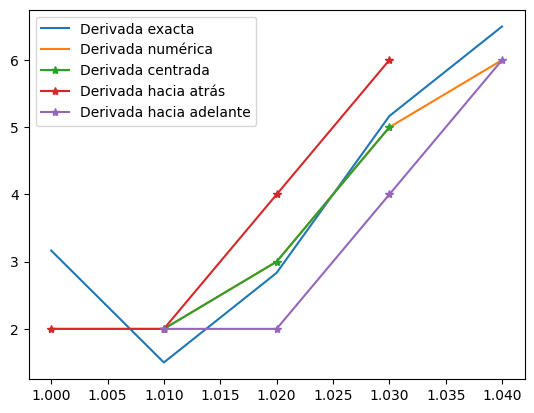

In [ ]:
datos = {'t':[1.00,1.01,1.02,1.03,1.04],'i': [3.10,3.12,3.14,3.18,3.24]}

data = pd.DataFrame(datos)

t_=  data['t']
i_ = data['i']

def derivada_adelante(x,y):
  return np.array([(y[i +1]-y[i])/(x[i+1]-x[i]) for i in range(len(x)-1)])


def derivada_atras(x,y):
  return np.array([(y[i]-y[i-1])/(x[i]-x[i-1]) for i in range(1,len(x))])

def derivada_centrada(x,y):
  return np.array([(y[i+1]-y[i-1])/(x[i+1]-x[i-1]) for i in range(1,len(x)-1)])


P= lagrange(t_,i_)
poly = np.poly1d(P)

x = sp.symbols('x')
f= poly(x)
dx = sp.diff(f,x)
dx = sp.lambdify(x,dx, 'numpy')

df_c= derivada_centrada(t_,i_)
df_a= derivada_atras(t_,i_)
df_d= derivada_adelante(t_,i_)
df_real= dx(t_)

'''Sabemos que en la derivada hacia adelante no puede tomar el ultimo valor, la derivada hacia atrás no puede tomar el primero
y la centrada no toma ninguno de los dos, porque para poder graficar, se utilizará np.nan para "acotar" y poder funcionar'''

df_c = np.insert(df_c, 0, np.nan)
df_c = np.append(df_c, np.nan)
df_a= np.append(df_a, np.nan)
df_d = np.insert(df_d, 0, np.nan)

derivada_gradiente = np.gradient(i_, t_)


plt.plot(t_, df_real, label='Derivada exacta')
plt.plot(t_, derivada_gradiente, label='Derivada numérica')
plt.plot(t_, df_c, label='Derivada centrada', marker = '*')
plt.plot(t_, df_a, label='Derivada hacia atrás', marker = '*')
plt.plot(t_, df_d, label='Derivada hacia adelante',marker = '*' )

plt.legend()
plt.show()


# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

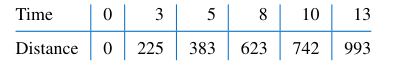



In [ ]:
tabla = {'time':[0,3,5,8,10,13],'Distancia':[0,225,383,623,742,993]}
data = pd.pandas.DataFrame(tabla)

t_ = data['time']
d_ = data['Distancia']

V = np.gradient(d_, t_)

P= lagrange(t_,V)

print(f'la velocidad en t=12 es de {P(12)}')

la velocidad en t=12 es de 81.55800000000855


#3
Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

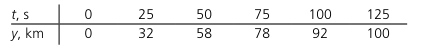

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

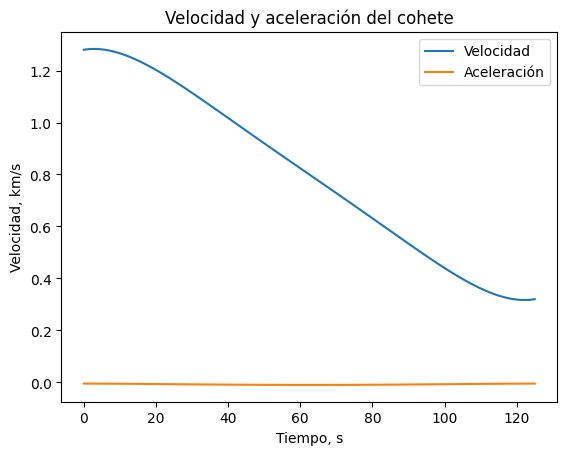

In [ ]:
datos_1 = {'t,s':[0,25,50,75,100,125],'y,km':[0,32,58,78,92,100]}
data = pd.pandas.DataFrame(datos_1)

t = data['t,s']
y = data['y,km']

V = np.gradient(y , t)
A = np.gradient(V , t)

P= lagrange(t,V)
Q= lagrange(t,A)

t = np.linspace(0,125,100)

plt.plot(t,P(t), label = 'Velocidad')
plt.plot(t,Q(t), label = 'Aceleración')
plt.legend()
plt.xlabel('Tiempo, s')
plt.ylabel('Velocidad, km/s')
plt.title('Velocidad y aceleración del cohete')
plt.show()

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

A= Campo eléctrico simbólico: k*q*z/(z**2 + 1.0e-6)**(3/2)
B= El campo eléctrico en z=0.1mm es 3.0579483623437574e+29


<ipython-input-31-15a8b3c87350>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


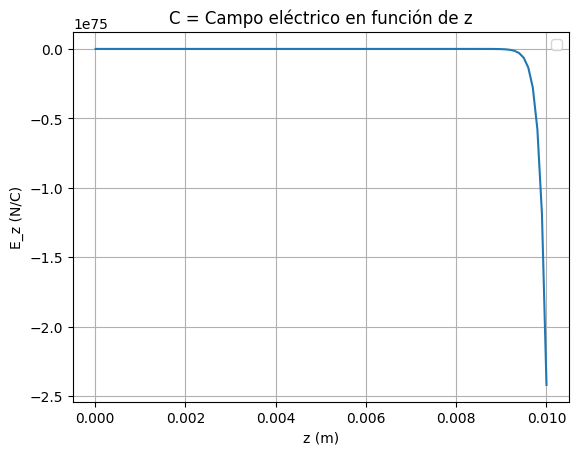

In [ ]:
import numpy as np
import sympy as sp
from scipy.interpolate import lagrange

'''Punto a'''
# Definición de parámetros
z = sp.symbols('z')
R = 1e-3  # Radio en metros
k = sp.symbols('k')
q_tot = sp.symbols('q')

# Potencial eléctrico
V = k * q_tot / sp.sqrt(z**2 + R**2)

# Reescalar el potencial eléctrico (Vr no depende de k ni q_tot)
Vr = V / (k * q_tot)

# Campo eléctrico (Ez = -dV/dz)
E_z = -sp.diff(V, z)
print("A= Campo eléctrico simbólico:", E_z)

'''Punto b'''
# Definir valores de z para evaluación numérica
z_valores = np.linspace(1e-5, 1e-2, 100)

# Convertir la función simbólica a una función numérica (reevaluada correctamente)
Vr_func = sp.lambdify(z, Vr.subs({k: 1, q_tot: 1}), 'numpy')

# Evaluar Vr para estos valores de z
Vr_vals = Vr_func(z_valores)

# Calcular el campo eléctrico numérico como la derivada de Vr
E_vals = -np.gradient(Vr_vals, z_valores)

# Interpolación con el polinomio de Lagrange
E = lagrange(z_valores, E_vals)

# Evaluar en z = 0.1 mm = 1e-4 m
print(f'B= El campo eléctrico en z=0.1mm es {E(1e-3)}')

plt.plot(z_valores, E(z_valores))
plt.xlabel('z (m)')
plt.ylabel('E_z (N/C)')
plt.title('C = Campo eléctrico en función de z')
plt.grid()
plt.legend()
plt.show()
